In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
csv_file_path = 'outbreaks.csv'
outbreaks_df = pd.read_csv(csv_file_path)
outbreaks_df.head()

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
0,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,20,0.0,0.0
1,1998,January,California,NaN,Custard,NaN,NaN,NaN,NaN,112,0.0,0.0
2,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,35,0.0,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",NaN,Scombroid toxin,NaN,Confirmed,4,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",NaN,Salmonella enterica,Enteritidis,Confirmed,26,3.0,0.0


In [3]:
virus_df = outbreaks_df

In [4]:
virus_df = virus_df['Species'].dropna()
virus_df

3                Scombroid toxin
4            Salmonella enterica
5                Shigella boydii
7            Salmonella enterica
8                          Virus
                  ...           
19113    Clostridium perfringens
19114     Norovirus genogroup II
19115     Norovirus genogroup II
19116     Norovirus genogroup II
19117     Norovirus genogroup II
Name: Species, Length: 12500, dtype: object

In [5]:
outbreaks_df.count()

Year                 19119
Month                19119
State                19119
Location             16953
Food                 10156
Ingredient            1876
Species              12500
Serotype/Genotype     3907
Status               12500
Illnesses            19119
Hospitalizations     15494
Fatalities           15518
dtype: int64

In [6]:
virus_df.head()

3        Scombroid toxin
4    Salmonella enterica
5        Shigella boydii
7    Salmonella enterica
8                  Virus
Name: Species, dtype: object

In [7]:
virus_df.count()

12500

In [8]:
virus_df.value_counts() 

Norovirus genogroup I                                             2744
Salmonella enterica                                               2303
Norovirus genogroup II                                            1424
Norovirus unknown                                                  790
Clostridium perfringens                                            732
                                                                  ... 
Campylobacter jejuni; Escherichia coli, Shiga toxin-producing        1
Bacillus other                                                       1
Escherichia coli, Shiga toxin-producing; Norovirus genogroup I       1
Clostridium perfringens; Streptococcus group A                       1
Bacillus cereus; Bacillus other                                      1
Name: Species, Length: 201, dtype: int64

In [9]:
virus_df = outbreaks_df.groupby('Species').filter(lambda x : len(x)>500)
virus_df = virus_df['Species'].value_counts()
virus_df

Norovirus genogroup I      2744
Salmonella enterica        2303
Norovirus genogroup II     1424
Norovirus unknown           790
Clostridium perfringens     732
Staphylococcus aureus       532
Name: Species, dtype: int64

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

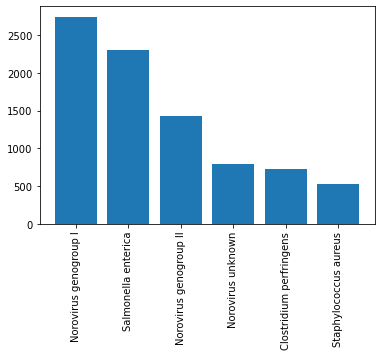

In [10]:
virus_series = virus_df
virus_frame = virus_series.to_frame()
virus_frame = virus_frame.head(20)
plt.bar(virus_frame.index, virus_frame["Species"])
plt.xticks(rotation='vertical')

In [11]:
food_df = outbreaks_df
food_df

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
0,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,20,0.0,0.0
1,1998,January,California,NaN,Custard,NaN,NaN,NaN,NaN,112,0.0,0.0
2,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,35,0.0,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",NaN,Scombroid toxin,NaN,Confirmed,4,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",NaN,Salmonella enterica,Enteritidis,Confirmed,26,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19114,2015,December,Wisconsin,Restaurant,NaN,NaN,Norovirus genogroup II,GII_14,Confirmed,4,0.0,0.0
19115,2015,December,Wisconsin,Private Home/Residence,Salsa,NaN,Norovirus genogroup II,GII_2,Confirmed,16,0.0,0.0
19116,2015,December,Wisconsin,Nursing Home/Assisted Living Facility,NaN,NaN,Norovirus genogroup II,GII_17 Kawasaki (2014),Confirmed,43,3.0,0.0
19117,2015,December,Wisconsin,Fast Food Restaurant,NaN,NaN,Norovirus genogroup II,GII_2,Confirmed,5,0.0,0.0


In [26]:
food_df['Food'].count()

721

In [12]:
food_df = food_df['Food'].dropna()
food_df

1                                        Custard
3                                      Fish, Ahi
4              Lasagna, Unspecified; Eggs, Other
7        Stuffing, Unspecified; Sandwich, Turkey
8                             Salad, Unspecified
                          ...                   
19105                    Meal Replacement Powder
19108                                  Foie Gras
19111                    Cookies, Chocolate Chip
19113                                Gravy, Pork
19115                                      Salsa
Name: Food, Length: 10156, dtype: object

In [34]:
food_df = outbreaks_df.groupby('Food').filter(lambda x : len(x)>100)
food_df['Food'].value_counts()

Multiple Foods            206
Oysters, Raw              165
Ground Beef, Hamburger    127
Salad, Unspecified        118
Chicken, Unspecified      105
Name: Food, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

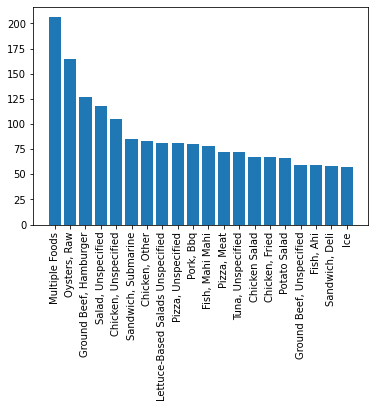

In [24]:
food_series = outbreaks_df['Food'].value_counts()
food_frame = food_series.to_frame()
food_frame = food_frame.head(20)
plt.bar(food_frame.index, food_frame["Food"])
plt.xticks(rotation='vertical')

In [37]:
food_virus_df = outbreaks_df

<function matplotlib.pyplot.show(*args, **kw)>

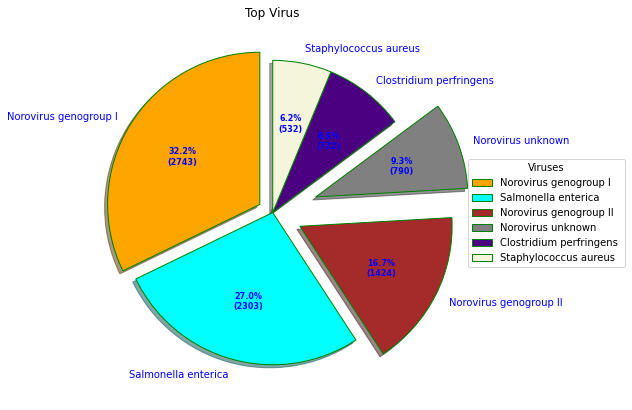

In [60]:
viruses = ['Norovirus genogroup I', 'Salmonella enterica', 'Norovirus genogroup II','Norovirus unknown','Clostridium perfringens ', 'Staphylococcus aureus ']
data = virus_df

explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0)

colors = ( "orange", "cyan", "brown",
          "grey", "indigo", "beige")

wp = { 'linewidth' : 1, 'edgecolor' : "green" }

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
fig, ax = plt.subplots(figsize =(10,7))
wedges, texts, autotexts = ax.pie(data, 
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode, 
                                  labels = viruses,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="Blue"))
ax.legend(wedges, viruses,
          title ="Viruses",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
  
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Top Virus")
  
  
plt.show

ValueError: setting an array element with a sequence.

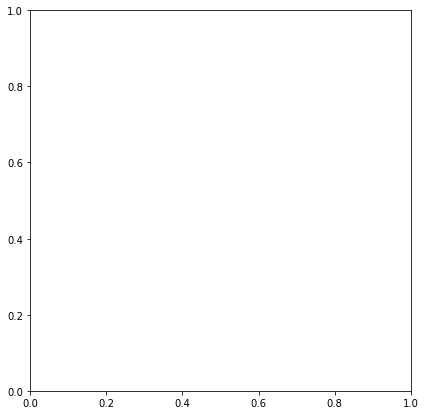

In [63]:
viruses = ['Norovirus genogroup I', 'Salmonella enterica', 'Norovirus genogroup II','Norovirus unknown','Clostridium perfringens ', 'Staphylococcus aureus ']
foodtype = ['Multiple Foods', 'Oysters, Raw', 'Ground Beef, Hamburger', 'Salad, Unspecified', 'Chicken, Unspecified' ,'Sandwich, Submarine']
data = food_df, virus_df

explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0)

colors = ( "orange", "cyan", "brown",
          "grey", "indigo", "beige")

wp = { 'linewidth' : 1, 'edgecolor' : "green" }

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
fig, ax = plt.subplots(figsize =(10,7))
wedges, texts, autotexts = ax.pie(data, 
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode, 
                                  labels = viruses,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="Blue"))
ax.legend(wedges, viruses,
          title ="Virus and Food",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
  
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Virus and Food")
  